<center> <h1>Neural Net from Scratch</h1> </center>
<img src="https://www.researchgate.net/publication/325831461/figure/fig2/AS:639036561567745@1529369597778/A-3-layer-neural-network-with-three-inputs-two-hidden-layers-consisting-of-four-neurons.png">

Purpose of this project is to understand how deep learning models are trained. One of the most used machine learning algorithms are deep learning algorithms. However, libraries like tensorflow, pytorch and sklearn(mlp) able us able to build neural networks at ease which prevents understanding of how weights are optimized. For this reason we will define our neural network and add attributes for train and test it.

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Neural networks have 2 main at train section. One of them is forward pass which enables put data from input through output. Other one is backpropogation, which is used to update weights by gradient descent. Also, few hyperparameters which can not be changed during training are:
* x -> input data
* y -> target data
* batch size -> batch number to feed neural net
* epochs -> epoch number
* lr -> learning rate

In [2]:
class ArtificialNeuralNetwork:
    def __init__(self, x, y, batch_size=32, epochs=50, lr=0.1, print_every=10, x_test = [], y_test=[]):
        # Data
        self.x = x 
        self.y = y
        self.x_test = x_test
        self.y_test = y_test
        
        self.print_every = print_every
        self.error = 0
        # Containers
        self.train_loss_l = []
        self.train_acc_l = []
        self.val_loss_l = []
        self.val_acc_l = []
        
        self.batch_size = batch_size
        self.epochs = epochs
        self.lr = lr
        
        # Weights
        self.layer1 = np.random.randn(self.x.shape[1], 64)
        self.layer2 = np.random.randn(self.layer1.shape[1], 32)
        self.layer3 = np.random.randn(self.layer2.shape[1], self.y.shape[1])        
        
        # Bias values
        self.bias1 = np.random.randn(self.layer1.shape[1], )
        self.bias2 = np.random.randn(self.layer2.shape[1], )
        self.bias3 = np.random.randn(self.layer3.shape[1], )
        
        
    def sigmoid(self,x_batch):
        return 1/(1+np.exp(-x_batch))
    
    def sigmoid_dt(self, x_batch):
        return self.sigmoid(x_batch)*(1 - self.sigmoid(x_batch))
    
    
    def forward_pass(self, x_batch):
        # Prediction-> passing layer from input through output
        self.b1 = self.w1 = np.dot(x_batch, self.layer1) + self.bias1
        self.w1 = self.sigmoid(self.b1)
        
        self.b2 = np.dot(self.w1, self.layer2) + self.bias2
        self.w2  = self.sigmoid(self.b2)
        
        self.b3 = np.dot(self.w2, self.layer3) + self.bias3
        self.w3  = self.sigmoid(self.b3)
        
    
        
    def backpropogation(self, x_batch, y_batch):
        # Get error
        self.error = (self.w3 - y_batch) / self.batch_size
        err3 = self.error
        
        # Activation functions are sigmoid 
        err3_dt = err3 * self.sigmoid_dt(self.w3)

        err2 = err3_dt.dot(self.layer3.T)
        # Derivative of the sigmoid for gradient descent side
        err2_dt = err2 * self.sigmoid_dt(self.w2)

        err1 = err2_dt.dot(self.layer2.T)
        err1_dt = err1 * self.sigmoid_dt(self.w1)
        
        # Updating weights
        self.layer3 -= self.w2.T.dot(err3_dt) * self.lr
        self.layer2 -= self.w1.T.dot(err2_dt) * self.lr
        self.layer1 -= x_batch.T.dot(err1_dt) * self.lr
        
        # Updating bias values
        self.bias3 -= sum(err3_dt) * self.lr
        self.bias2 -= sum(err2_dt) * self.lr
        self.bias1 -= sum(err1_dt) * self.lr
        
    # Train the model
    def train(self):
        # Proper iteration number with respect to batch size
        N = len(x) // self.batch_size
        
        # Output container lists
        self.train_loss_l = []
        self.train_acc_l = []
        
        self.val_loss_l = []
        self.val_acc_l = []
        
        # Train respect to epoch num
        for ep in range(self.epochs):
            # Total loss error container
            total = 0
            
            # Shuffle to optimize training
            self.shuffle()
            
            # Train 
            for i in range(N):
                if i*self.batch_size + self.batch_size:
                    # Get batches
                    x_batch = self.x[i*self.batch_size:i*self.batch_size + self.batch_size]
                    y_batch = self.y[i*self.batch_size:i*self.batch_size + self.batch_size]
                    
                    # Forward pass to predict every batch
                    self.forward_pass(x_batch)
                    
                    # Backpropogation to optimize weights by gradient descent
                    self.backpropogation(x_batch, y_batch)
                    
                    # Total error container
                    total += sum(abs(self.error))
            
            # Append loss and accuracy
            train_loss = round((total / N)[0],3)
            train_acc = round(self.test(self.x, self.y)[0], 3)
            
            self.train_loss_l.append(train_loss)
            self.train_acc_l.append(train_acc)
            
            # If test data is given calculate loss and accuracy
            if len(self.x_test) > 1:
                val_total = 0
                # Proper iteration number with respect to batch size
                N2 = len(self.x_test) // self.batch_size
                
                for k in range(N2):
                    if i*self.batch_size + self.batch_size:
                        # Get batches
                        x_batch = self.x_test[k*self.batch_size:k*self.batch_size + self.batch_size]
                        y_batch = self.y_test[k*self.batch_size:k*self.batch_size + self.batch_size]
                        
                        # Forward pass for prediction
                        self.forward_pass(x_batch)
                        # Get loss error
                        val_total += sum(abs((self.w3 - y_batch) / self.batch_size))
                        
                # Append loss and accuracy
                val_acc = round(self.test(self.x_test, self.y_test)[0],3)
                val_loss = round((val_total / N2)[0],3)
                
                self.val_loss_l.append(val_loss)
                self.val_acc_l.append(val_acc)
            # Print current outputs with respect to print_every parameter
            
            if ep % self.print_every == 0:
                print("Train Accuracy", round(train_acc,3), "Loss: ", round(train_loss, 3), end= " ")
                
                # If test data is given
                if len(self.x_test) > 1:
                    print("\tValidation Accuracy", val_acc, "Validation Loss: ", val_loss)
                print("")
                
            
    def shuffle(self):
        # Combine input and output
        train_data = np.concatenate([self.x, self.y] ,axis=1)
        
        # Shuffle
        np.random.shuffle(train_data)
        
        # Seperate input and output
        self.x, self.y = train_data[:, :-1], train_data[:, -1].reshape(-1, 1)
  
    def test(self, x_test, y_test):
        # Predict
        self.forward_pass(x_test)
        
        # Assign 1 or 0 by considering output probability
        w3 = [1 if ea_pred > 0.5 else 0 for ea_pred in self.w3]
        
        # Get accuracy for prediction
        accuracy = sum([y_pred == y_true for y_pred, y_true in zip(w3, y_test)]) / len(y_test)
        return accuracy
    
    def plot(self):
        # 1 for accuracy and 1 for loss subplots
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        # Indexing
        index_l  = [i for i in range(len(self.train_loss_l))]
        # Loss plot
        axes[0].plot(index_l, self.train_loss_l)
        axes[0].plot(index_l, self.val_loss_l)
        
        axes[0].set_xlabel("Epochs")
        axes[0].set_ylabel("Loss")
        axes[0].set_title("Loss per Epoch")
        axes[0].legend(["Train Loss", "Val Loss"])
        
        # Accuracy plot
        axes[1].plot(index_l, self.train_acc_l)
        axes[1].plot(index_l, self.val_acc_l)
        
        axes[1].set_xlabel("Epochs")
        axes[1].set_ylabel("Accuracy")
        axes[1].set_title("Accuracy per Epoch")
        axes[1].legend(["Train Acc", "Val Acc"])

Now, our neural network model is defined. It is time to import and train our model.

In [3]:
# Load data set
df = pd.read_csv("datasets/data.csv")

y = df[["diagnosis"]].values
x = df.drop("diagnosis", axis=1).values

# Train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Initialize Model
model = ArtificialNeuralNetwork(X_train, y_train, epochs=250, print_every=25, x_test=X_test, y_test=y_test)

# Train
model.train()

Train Accuracy 0.525 Loss:  0.458 	Validation Accuracy 0.514 Validation Loss:  0.462

Train Accuracy 0.959 Loss:  0.064 	Validation Accuracy 0.955 Validation Loss:  0.096

Train Accuracy 0.976 Loss:  0.049 	Validation Accuracy 0.961 Validation Loss:  0.077

Train Accuracy 0.974 Loss:  0.042 	Validation Accuracy 0.966 Validation Loss:  0.068

Train Accuracy 0.974 Loss:  0.038 	Validation Accuracy 0.972 Validation Loss:  0.063

Train Accuracy 0.976 Loss:  0.035 	Validation Accuracy 0.972 Validation Loss:  0.06

Train Accuracy 0.976 Loss:  0.032 	Validation Accuracy 0.966 Validation Loss:  0.058

Train Accuracy 0.976 Loss:  0.031 	Validation Accuracy 0.966 Validation Loss:  0.056

Train Accuracy 0.976 Loss:  0.03 	Validation Accuracy 0.966 Validation Loss:  0.055

Train Accuracy 0.976 Loss:  0.028 	Validation Accuracy 0.966 Validation Loss:  0.054



In [4]:
print("Test Accuracy {0}%".format(round(model.test(X_test, y_test)[0]*100, 3)))

Test Accuracy 96.089%


#### Loss and accuracy progress visualization

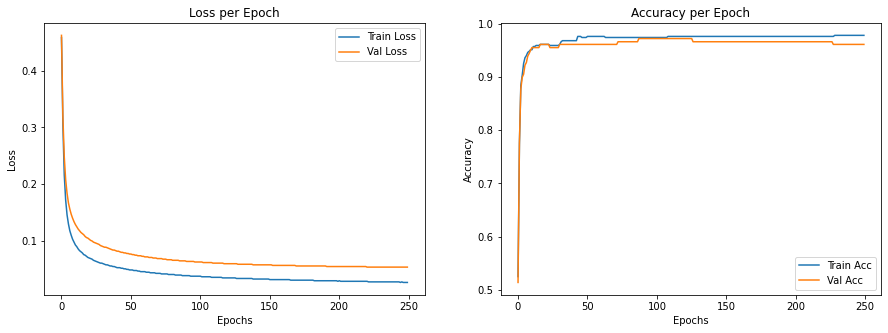

In [5]:
model.plot()